In [1]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
#birth rate 
u = 0.059
#death rate 
v = 0.007139
#beta coefficient for I
B = 0.18
#Infected to recovered constnt 
Y = 0.35
#Recovered to infected constant 
X = 0.0353


In [4]:
# Total Polulation overtime
population = 120
P = np.linspace(1, 1 + u * population - v * population , population)

#Initial rates for  S, I, R
I0 , R0 = 0.0332, 0
S0 = 0.32

#Total number of people in SIR cycle
N = S0 + I0 + R0

t = np.linspace(0, population, population)

In [5]:
def deriv(y, t):
    S, I, R = y
    dSdT = u + -1 * B * S * I - v * S
    dIdT = B * S * I - Y*I + X*R - v*I
    dRdT = Y*I - X*R - v*R
    return dSdT, dIdT, dRdT


In [7]:
y0 = S0, I0, R0

ret = odeint(deriv, y0, t)

S, I, R = ret.T

S

array([0.32      , 0.31833053, 0.31707574, 0.31611474, 0.3153621 ,
       0.31475727, 0.31425731, 0.31383167, 0.31345862, 0.3131227 ,
       0.31281287, 0.31252131, 0.3122424 , 0.31197216, 0.31170774,
       0.31144713, 0.31118886, 0.31093191, 0.31067553, 0.31041922,
       0.31016258, 0.30990535, 0.30964733, 0.3093884 , 0.30912844,
       0.30886739, 0.30860519, 0.30834181, 0.30807722, 0.30781139,
       0.30754432, 0.30727598, 0.30700638, 0.30673549, 0.30646333,
       0.30618987, 0.30591512, 0.30563907, 0.30536172, 0.30508307,
       0.3048031 , 0.30452182, 0.30423923, 0.30395532, 0.30367008,
       0.30338353, 0.30309564, 0.30280643, 0.30251589, 0.30222401,
       0.30193079, 0.30163624, 0.30134034, 0.3010431 , 0.30074451,
       0.30044457, 0.30014327, 0.29984063, 0.29953662, 0.29923126,
       0.29892454, 0.29861645, 0.298307  , 0.29799618, 0.29768399,
       0.29737043, 0.2970555 , 0.29673919, 0.2964215 , 0.29610244,
       0.29578199, 0.29546016, 0.29513695, 0.29481235, 0.29448

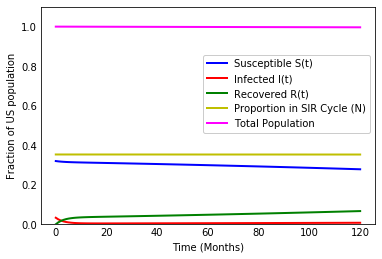

In [26]:
fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, axisbelow=True)

ax.plot(t, S, 'b', alpha = 1, lw = 2, label = "Susceptible S(t)")
ax.plot(t, I, 'r', alpha = 1, lw = 2, label = "Infected I(t)")
ax.plot(t, R, 'g', alpha = 1, lw = 2, label = "Recovered R(t)")

ax.plot(t , (S + I + R), 'y', alpha = 1, lw = 2, label = "Proportion in SIR Cycle (N)")
ax.plot(t, P, 'magenta', alpha = 1, lw=2, label = "Total Population")
ax.set_xlabel("Time (Months)")
ax.set_ylabel("Fraction of US population")

ax.set_ylim(0, 1.1)
ax.yaxis.set_tick_params(length = 0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which ='major', c = 'w', lw=2, ls='-')

legend = ax.legend(loc='center right', bbox_to_anchor=(1, 0.6)
                  )
legend.get_frame().set_alpha(1)
plt.show(block=True)
